In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import string

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


#### Firstly, enter the paths of the corresonding input files in the code cell below.
- You only need to change the name of the subreddit (reddit_name)

In [4]:
reddit_name = "europe"

CASH_PATH = "C:/Users/peapo/DataSci_Project/DataScienceProject"
MERT_PATH = "/Users/merterol/Desktop/UZH/CompLing:CompSci/CompSci/Sem2/ESC403/ESC403_Project/DataScienceProject"
# CHANGE THIS
OWNER_PATH = MERT_PATH
#

POSTS = f"{OWNER_PATH}/cleaned jsons/cleaned/theworldnews_submissions_csv_cleaned.csv"

SENTIMENTS = f"{OWNER_PATH}/sentiment/sentiment_{reddit_name}_comments_cleaned_pretty.json"
CLEANED = f"{OWNER_PATH}/raw data/pretty jsons/{reddit_name}_comments_cleaned_pretty.json"

OUTPUT_SENT = f"{OWNER_PATH}/visuals/df_csv/{reddit_name}_df_sent.csv"
OUTPUT_CLEANED = f"{OWNER_PATH}/visuals/df_csv/{reddit_name}_df_cleaned.csv"

MERGED = f"{OWNER_PATH}/visuals/df_csv/{reddit_name}_df_merged.csv"

# Important:

- This script is designed in a way that if the paths above are set correctly, it can be ran all the way to the end.
- If the paths are not set correctly, the script might behave very differently than expected.
- MAKE SURE TO SET THE PATHS CORRECTLY.

# Conversion

#### Converting the input files to the required format and then merging them into a single file that can be used for manipulation and visualization

#### JSON to CSV converter

In [5]:
with open(SENTIMENTS, "r") as file:
    data = json.load(file)

df = pd.DataFrame(list(data.items()), columns=["Date", "Text"])

df[["Polarity", "Subjectivity"]] = df["Text"].apply(pd.Series)

df.drop(columns=["Text"], inplace = True)

df.to_csv(OUTPUT_SENT, index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/merterol/Desktop/UZH/CompLing:CompSci/CompSci/Sem2/ESC403/ESC403_Project/DataScienceProject/sentiment/sentiment_theworldnews_comments_cleaned_pretty.json'

In [ ]:
with open(CLEANED, "r") as file:
    data = json.load(file)

df = pd.DataFrame(list(data.items()), columns=["Date", "Text"])

df["Text"] = df["Text"].str.replace("[^\w\s]", "", regex=True)
df["Text"] = df["Text"].str.replace("\n", " ", regex=True)
df["Text"] = df["Text"].str.replace("\r", " ", regex=True)

df.to_csv(OUTPUT_CLEANED, index=False)


#### Combining the two newly generated csv files on their common column

In [ ]:

def merge_posts_and_comments(df_posts,dfcomments,output):

    df_new = pd.DataFrame(data={
        "Date": pd.to_datetime(df_posts.timestamp),
#        "Text": df_posts["title"] + " | " + df_posts["selftext"],
        "Polarity": (df_posts.title_polarity + df_posts.text_polarity) * 0.5,
        "Subjectivity": (df_posts.title_subjectivity + df_posts.text_subjectivity) * 0.5,
    })

    df_new["Text"] = df_posts.apply(lambda row: str(row["title"])+ " | "+ str(row["selftext"]), axis=1)

    dfcomments["Date"] = pd.to_datetime(dfcomments["Date"])


    print(df_new.head())
#    dfcomments.set_index("Date", inplace=True)
#    df_new.set_index("Date",inplace=True)

    df_merged = pd.concat([df_new, dfcomments],ignore_index=True,axis=0)

#    df_merged.set_index("Date",inplace=True)

    df_merged.to_csv(output, index=False)

    return df_merged

df_sent = pd.read_csv(OUTPUT_SENT)
df_cleaned = pd.read_csv(OUTPUT_CLEANED)

df_posts = pd.read_csv(POSTS)

df_merged = pd.merge(df_cleaned, df_sent, on="Date", how="inner")
df_merged.to_csv(MERGED, index=False)


merge_posts_and_comments(df_posts, df_merged, MERGED)


                 Date  Polarity  Subjectivity  \
0 2012-04-29 05:46:55  0.028283      0.314646   
1 2012-05-05 07:08:35  0.000000      0.000000   
2 2012-05-10 07:08:53  0.000000      0.000000   
3 2012-05-14 15:02:56 -0.025000      0.200000   
4 2012-05-14 03:07:13  0.142857      0.267857   

                                                Text  
0  New research finds that it’s alarmingly easy t...  
1  CERN Scientist Sentenced to 5 Years in Terrori...  
2  TIL why radio buttons are called radio buttons...  
3  Brain oscillations reveal that our senses do n...  
4  "Right now we have access to every classified ...  


,Date,Polarity,Subjectivity,Text
0,2012-04-29 05:46:55,0.028283,0.314646,New research finds that it’s alarmingly easy t...
1,2012-05-05 07:08:35,0.000000,0.000000,CERN Scientist Sentenced to 5 Years in Terrori...
2,2012-05-10 07:08:53,0.000000,0.000000,TIL why radio buttons are called radio buttons...
3,2012-05-14 15:02:56,-0.025000,0.200000,Brain oscillations reveal that our senses do n...
4,2012-05-14 03:07:13,0.142857,0.267857,"""Right now we have access to every classified ..."
...,...,...,...,...
45329,2022-12-31 22:08:53,0.275000,0.725000,It looks like OP posted an AMP link These shou...
45330,2022-12-31 22:28:34,-0.366667,0.633333,There is no way the USA is behind this If anyt...
45331,2022-12-31 22:57:24,0.000000,0.000000,Danke Liebe Deutschland aus Amerika
45332,2022-12-31 23:32:10,0.166667,0.569444,I am sure these deaths are all just odd coinci...


# Start of DataFrame manipulation

In [ ]:
df = pd.read_csv(MERGED)
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df.head()

,Polarity,Subjectivity,Text
Date,,,
2012-04-29 05:46:55,0.028283,0.314646,New research finds that it’s alarmingly easy t...
2012-05-05 07:08:35,0.000000,0.000000,CERN Scientist Sentenced to 5 Years in Terrori...
2012-05-10 07:08:53,0.000000,0.000000,TIL why radio buttons are called radio buttons...
2012-05-14 15:02:56,-0.025000,0.200000,Brain oscillations reveal that our senses do n...
2012-05-14 03:07:13,0.142857,0.267857,"""Right now we have access to every classified ..."


### EDA

In [ ]:
print("DataFrame Description")
print(df.describe())

print("\nisnull sum:")
print(df.isnull().sum())
print("\nDtypes in DataFrame")
print(df.dtypes)


DataFrame Description
           Polarity  Subjectivity
count  27388.000000  27388.000000
mean       0.068983      0.363681
std        0.258992      0.304055
min       -1.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.400000
75%        0.206667      0.587500
max        1.000000      1.000000

isnull sum:
Text            28
Polarity         0
Subjectivity     0
dtype: int64

Dtypes in DataFrame
Text             object
Polarity        float64
Subjectivity    float64
dtype: object


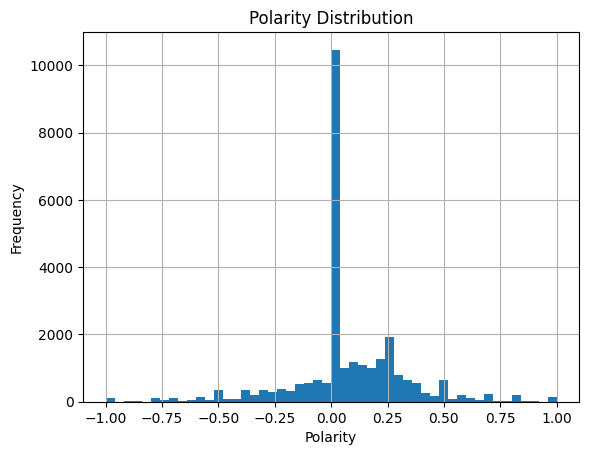

In [ ]:
df["Polarity"].hist(bins=50)
plt.title("Polarity Distribution")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

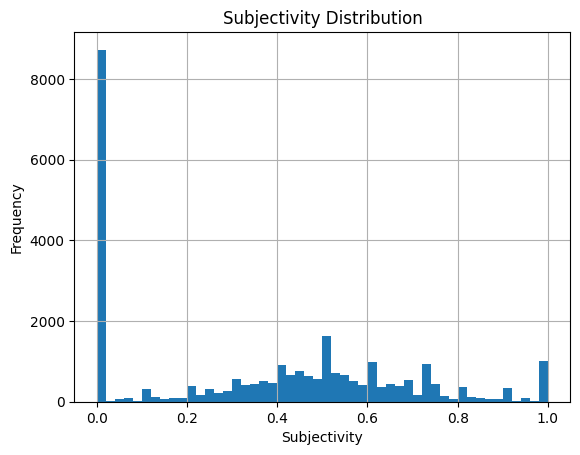

In [ ]:
df["Subjectivity"].hist(bins=50)
plt.title("Subjectivity Distribution")
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")
plt.show()

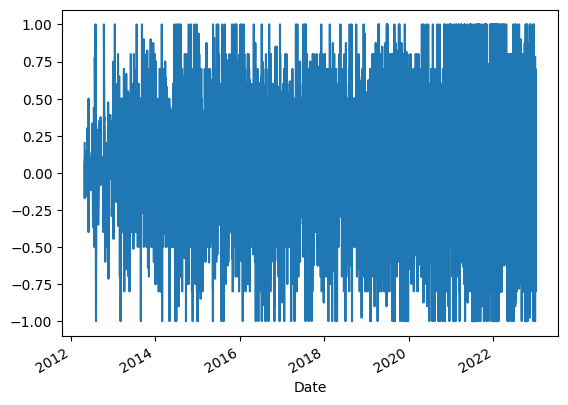

In [ ]:
df["Polarity"].plot()
plt.show()

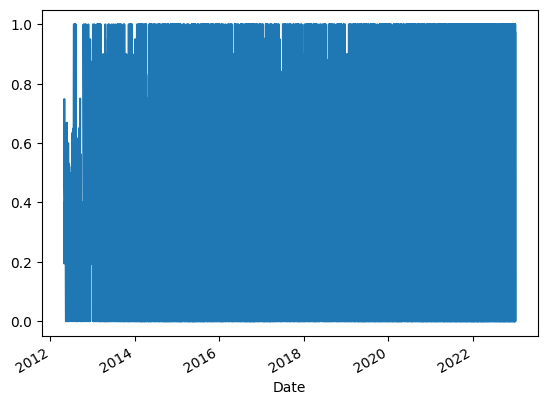

In [ ]:
df["Subjectivity"].plot()
plt.show()

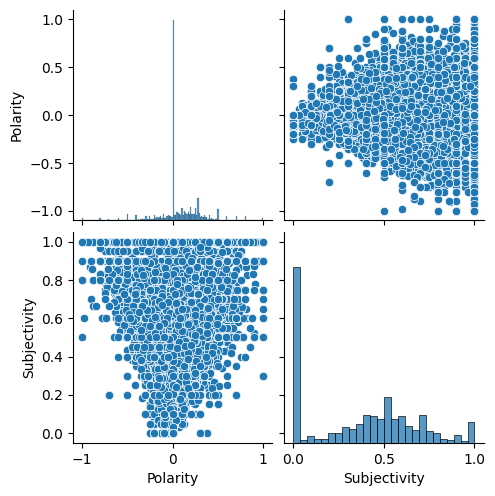

In [ ]:
plt.figsize=(15, 10)
sns.pairplot(df)
plt.show()

## Detailed Graphs

In [ ]:
df["Year"] = df.index.year
df["Month"] = df.index.month

# Create pivot tables for each attribute
polarity_pivot = df.pivot_table(values="Polarity", index="Month", columns="Year", aggfunc="mean", fill_value=0)
subjectivity_pivot = df.pivot_table(values="Subjectivity", index="Month", columns="Year", aggfunc="mean", fill_value=0)

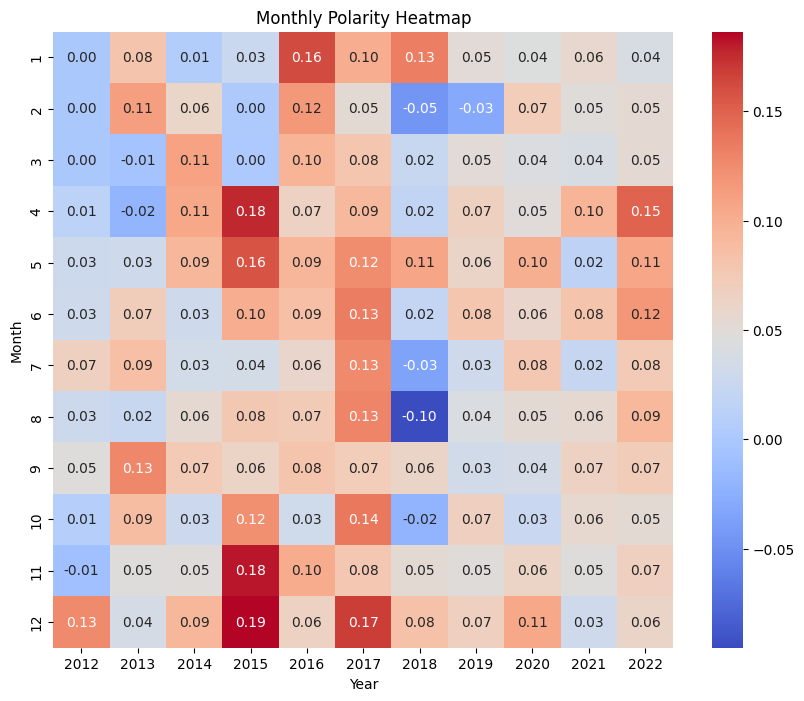

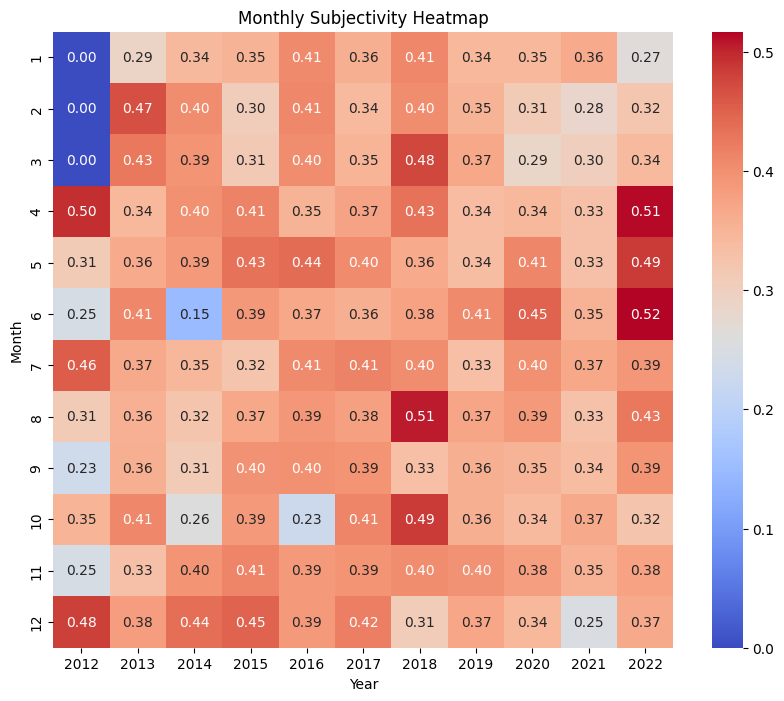

In [ ]:

# Heatmap for Polarity
plt.figure(figsize=(10, 8))
sns.heatmap(polarity_pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Monthly Polarity Heatmap")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

# Heatmap for Subjectivity
plt.figure(figsize=(10, 8))
sns.heatmap(subjectivity_pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Monthly Subjectivity Heatmap")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

Getting Sentiment Distributions

In [ ]:
# creating new column to categorize the sentiment
df["Sentiment"] = df["Polarity"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))
df.head()

,Text,Polarity,Subjectivity,Year,Month,Sentiment
Date,,,,,,
2012-04-29 06:02:36,This has been on the front page the whole day ...,0.200000,0.400000,2012,4,Positive
2012-04-29 06:10:37,Which front page Its not on mine Anyway its cl...,-0.033333,0.194444,2012,4,Negative
2012-04-29 06:25:19,The mysteries of the universe will never be ex...,-0.171667,0.748333,2012,4,Negative
2012-04-29 06:27:33,Dont read the rallnew feed is my advice to you...,0.060786,0.641510,2012,4,Positive
2012-05-05 07:26:37,Interesting article While in most cases it see...,0.147222,0.405556,2012,5,Positive


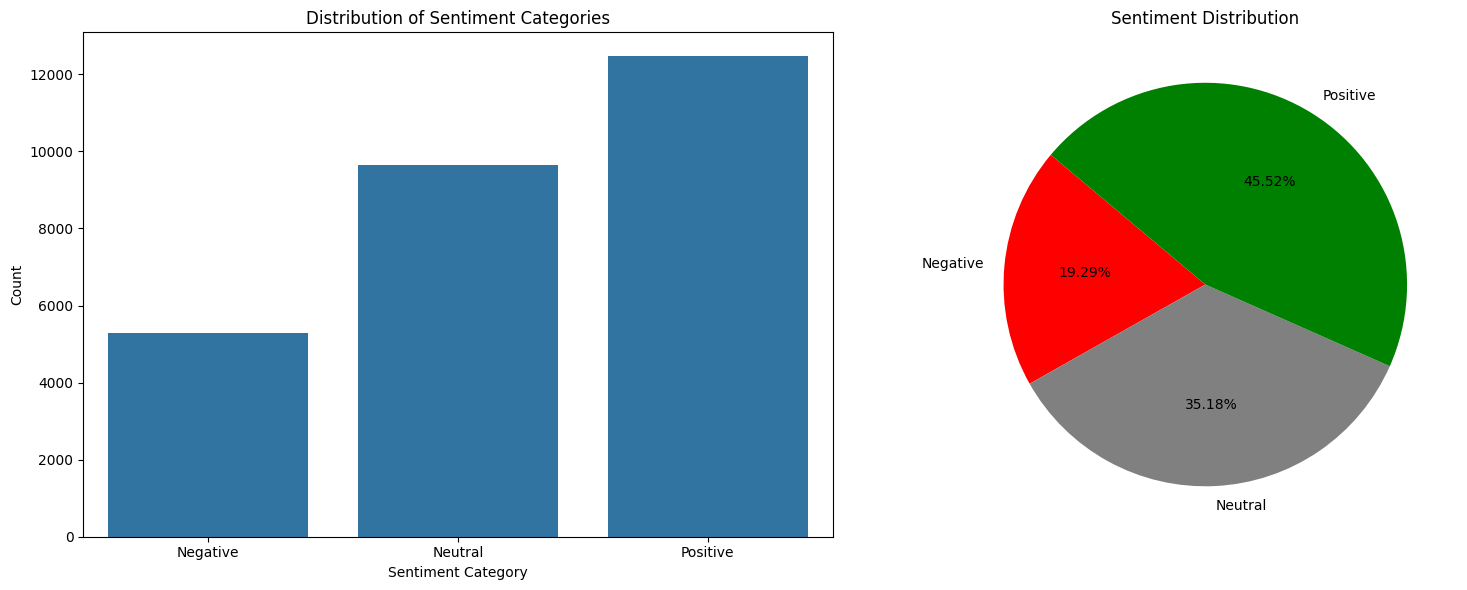

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x="Sentiment", data=df, order=["Negative", "Neutral", "Positive"], ax=ax1)
ax1.set_title("Distribution of Sentiment Categories")
ax1.set_xlabel("Sentiment Category")
ax1.set_ylabel("Count")

sentiment_counts = df["Sentiment"].value_counts()[["Negative", "Neutral", "Positive"]]

ax2.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.2f%%", startangle=140, colors=["red", "grey", "green"])
ax2.set_title("Sentiment Distribution")

plt.tight_layout()
plt.show()


#### Sentiment Distro overall

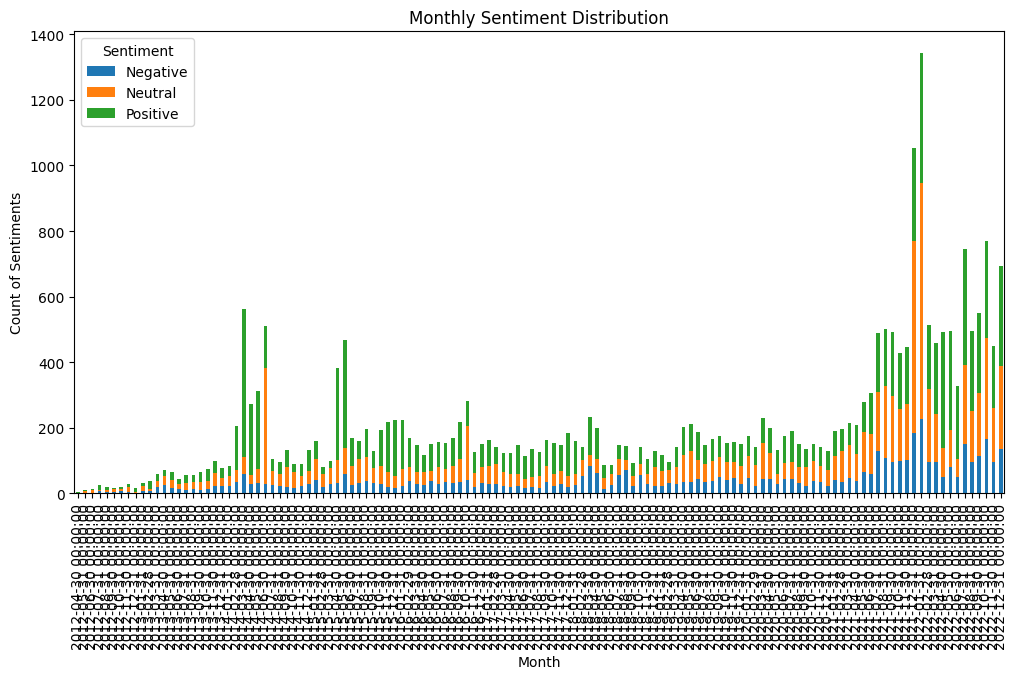

In [ ]:
monthly_sentiment = df.groupby(["Sentiment"]).resample("M").size().unstack(0).fillna(0)

monthly_sentiment.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Monthly Sentiment Distribution")
plt.xlabel("Month")
plt.ylabel("Count of Sentiments")
plt.legend(title="Sentiment")
plt.show()

#### Going into more detail each year

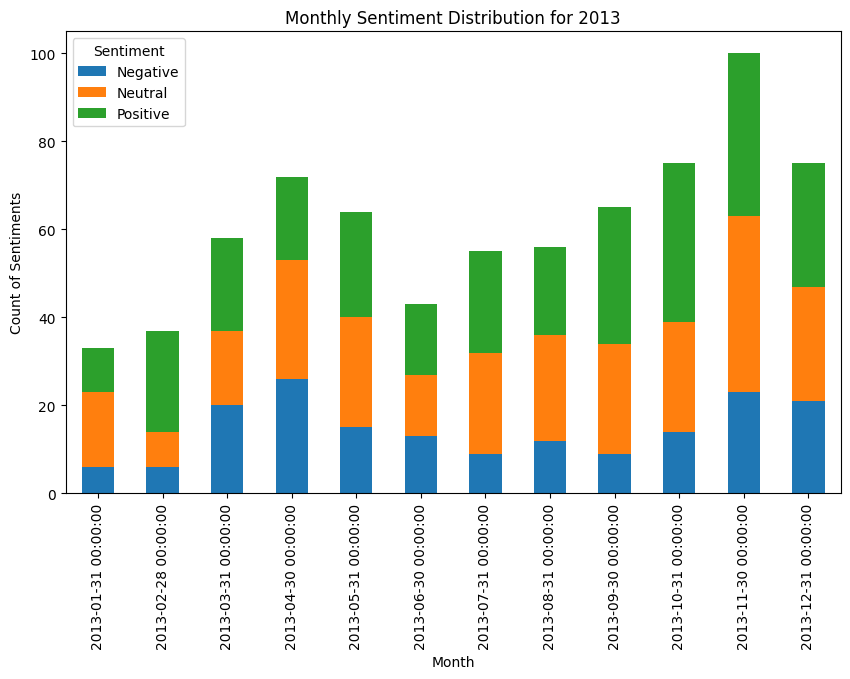

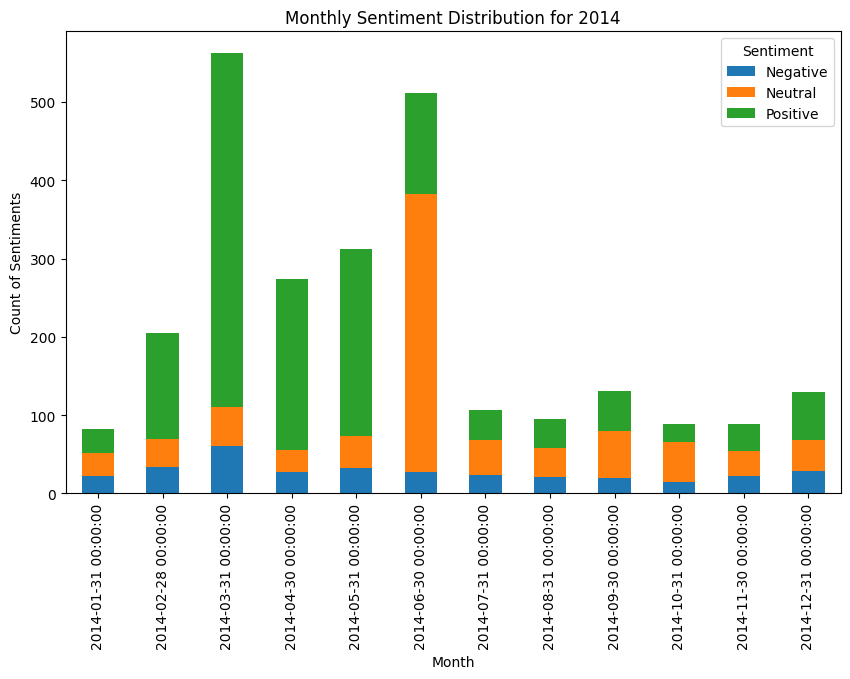

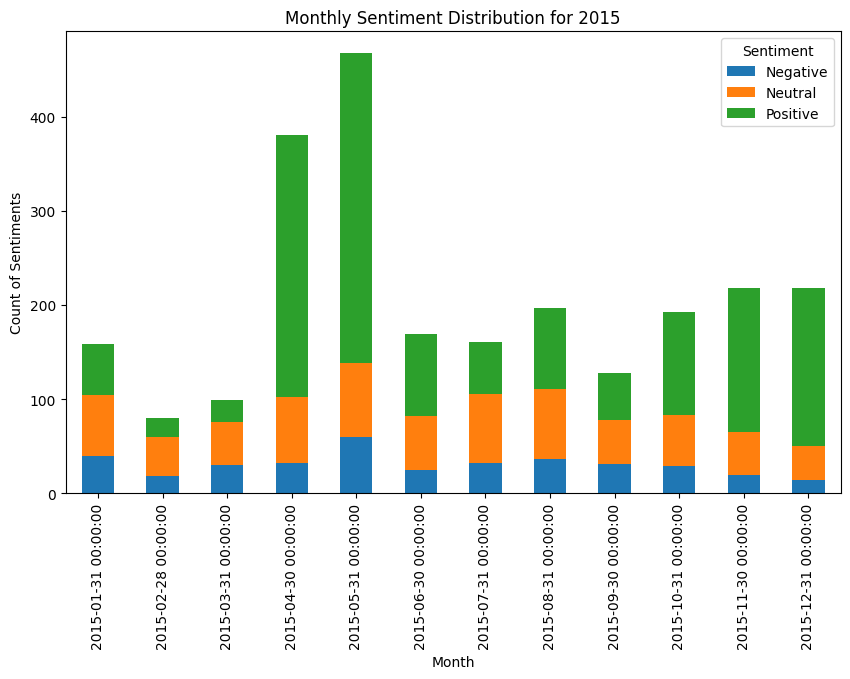

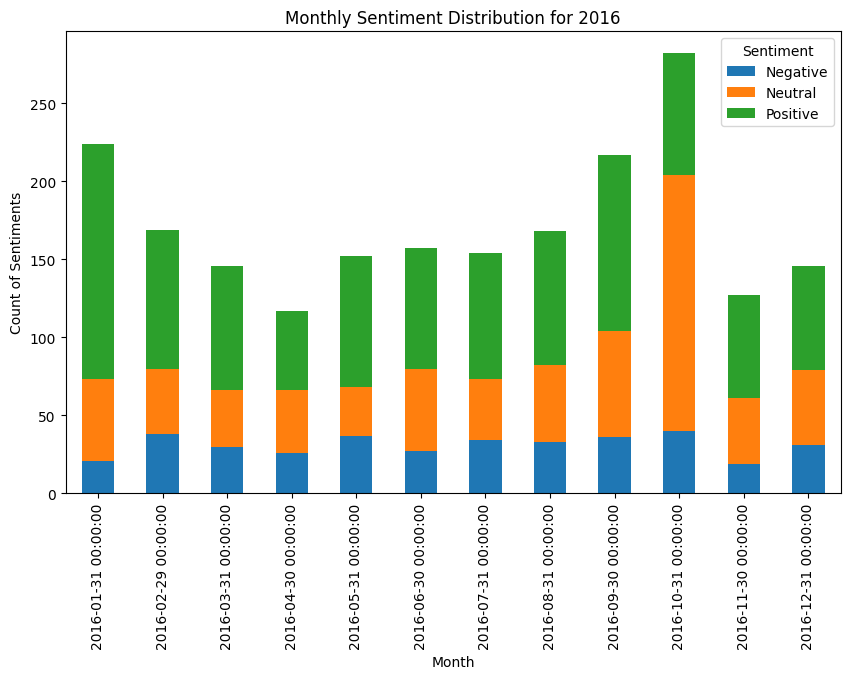

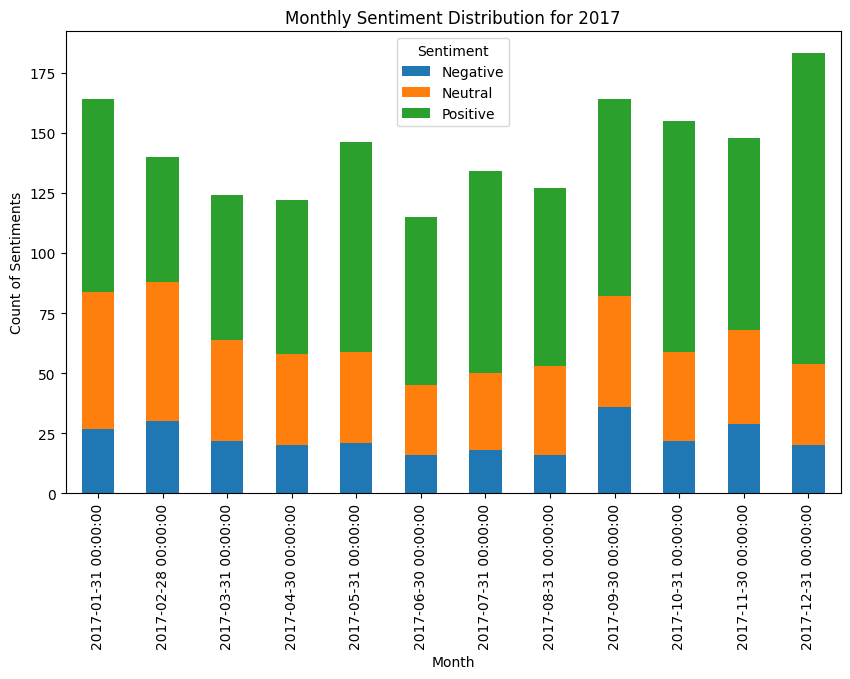

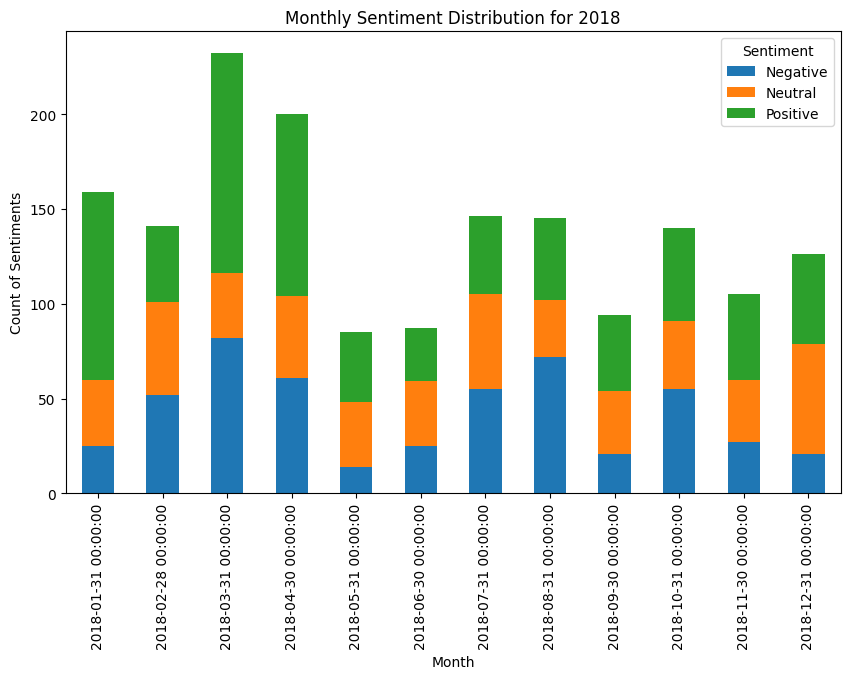

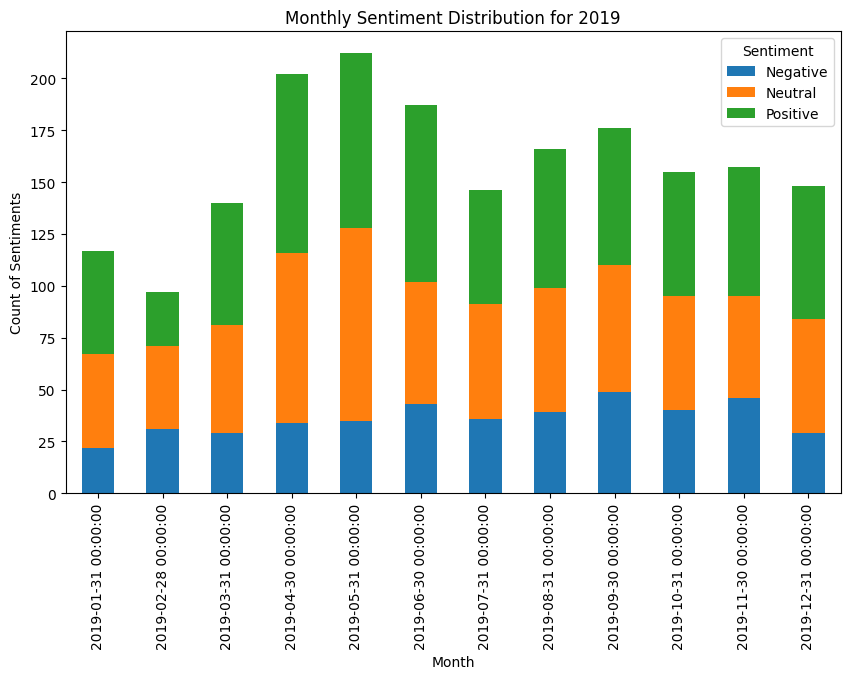

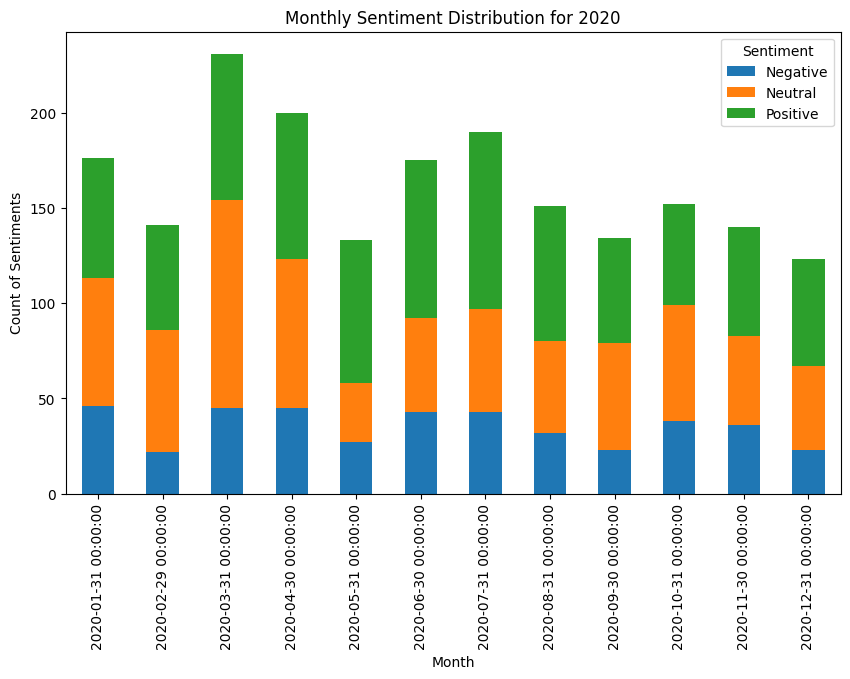

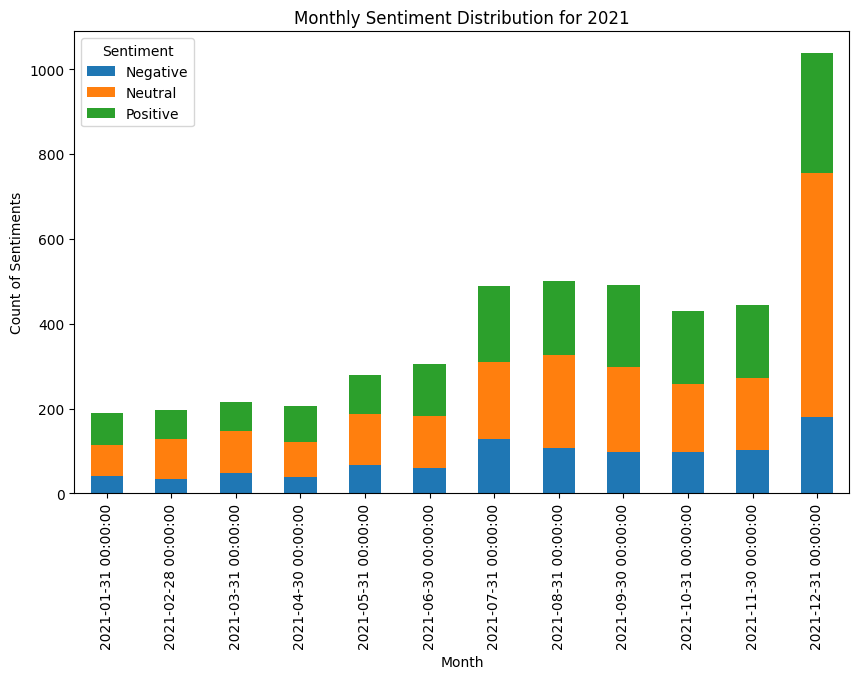

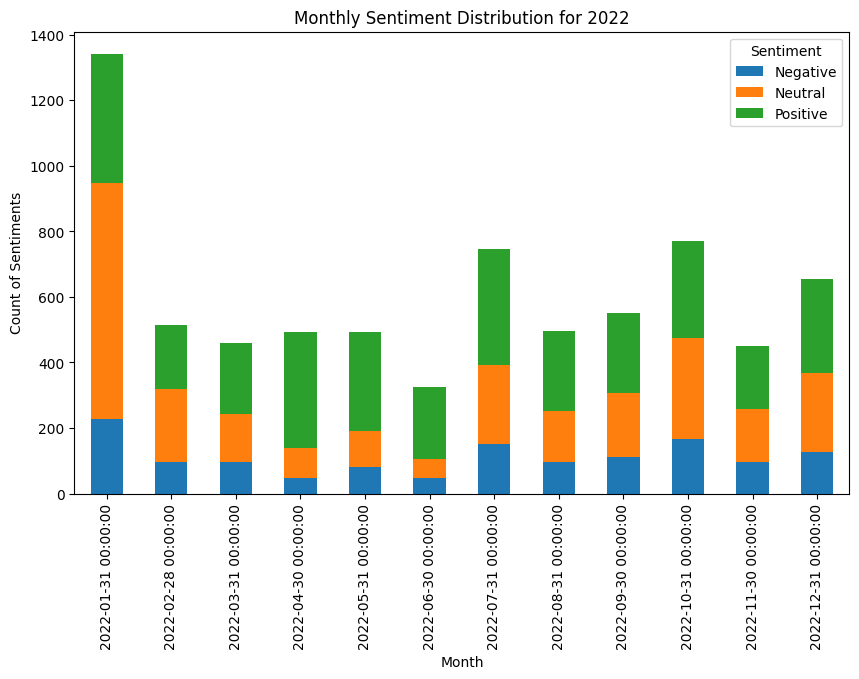

In [ ]:
df.sort_index(inplace=True)
years = df.index.year.unique()

for year in years:
    start_date = pd.Timestamp(year=year, month=1, day=1)
    end_date = pd.Timestamp(year=year, month=12, day=31)

    if start_date >= df.index.min() and end_date <= df.index.max():
        yearly_data = df[start_date:end_date]
        
        if not yearly_data.empty:
            monthly_sentiment = yearly_data.groupby("Sentiment").resample("M").size().unstack(0).fillna(0)
            
            monthly_sentiment.plot(kind="bar", stacked=True, figsize=(10, 6))
            plt.title(f"Monthly Sentiment Distribution for {year}")
            plt.xlabel("Month")
            plt.ylabel("Count of Sentiments")
            plt.legend(title="Sentiment")
            plt.show()

## Wordclouds

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
positive_texts = df[df["Sentiment"] == "Positive"]["Text"].dropna()
negative_texts = df[df["Sentiment"] == "Negative"]["Text"].dropna()

positive_text = " ".join(text for text in positive_texts)
negative_text = " ".join(text for text in negative_texts)

stopwords = set(STOPWORDS)
stopwords.update([])

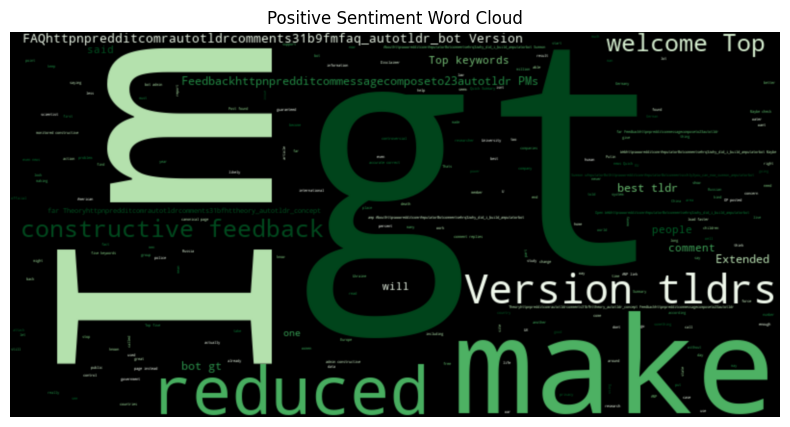

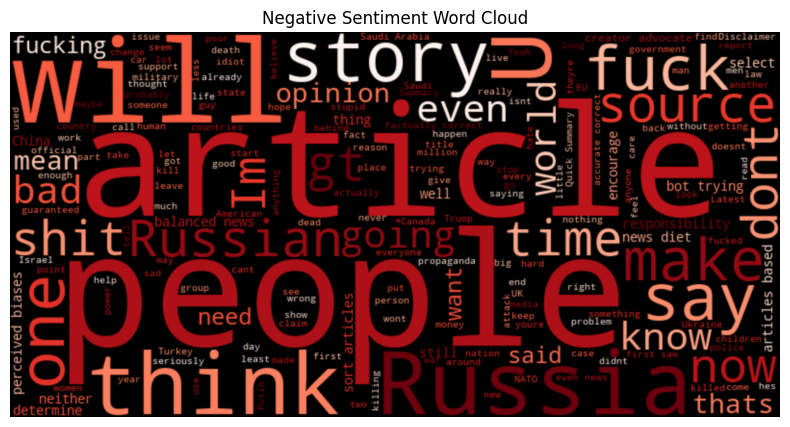

In [ ]:
def create_wordcloud(text, title, colormap="viridis"):
    wordcloud = WordCloud(width=800, height=400, background_color="black", stopwords=stopwords, colormap=colormap).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bicubic")
    plt.axis("off")
    plt.title(title)
    plt.show()

create_wordcloud(positive_text, "Positive Sentiment Word Cloud", colormap="Greens")
create_wordcloud(negative_text, "Negative Sentiment Word Cloud", colormap="Reds")